Author: Tashay Green

An interesting urban question is "can we measure and predict energy use based on observables that are easier to be acquired". For example the urban observatory at CUSP can monitor lights: they are a realtively easy observable. All you need is a camera, and a pipeline to process your data. But how does the light coming from a window relate to the total energy consumption? We generally postulate that light is a proxy for occupancy, and that occupancy is a good predictor of energy consumption.

So let's test if the last link holds. If we have data on the energy consumed by a building how well does that relate to the number of units in the building?

In [1]:
import geopandas as gp
import pandas as pd
import pylab as pl
import os
import json
import zipfile
import numpy as np
from pandas.tools.plotting import scatter_matrix

%pylab inline

Populating the interactive namespace from numpy and matplotlib


## Read in Data for Exploration

In [2]:
os.getenv('PUIDATA')
dataFile = os.getenv('PUIDATA') + '/' + 'Energy_and_Water_Data_Disclosure_for_Local_Law_84__2013_.csv'
nrg = pd.read_csv(dataFile)

In [3]:
myzip = zipfile.ZipFile(os.getenv('PUIDATA') + '/' + 'mn_mappluto_16v1.zip')
myzip.extractall()
myzip.open('MNMapPLUTO.shp')
bsize = gp.read_file('MNMapPLUTO.shp')

## Select Relevant Data

In [4]:
nrg.columns
nrg.rename(columns={'NYC Borough, Block, and Lot (BBL)':'BBL'}, inplace=True)
nrg = nrg [['BBL','Zip Code','Reported Property Floor Area (Building(s)) (ft²)', 'DOF Number of Buildings', 'Site EUI(kBtu/ft2)']]
nrg.head()

,BBL,Zip Code,Reported Property Floor Area (Building(s)) (ft²),DOF Number of Buildings,Site EUI(kBtu/ft2)
0,1.000410e+09,NaN,918919,NaN,NaN
1,4.021460e+09,11375.0,NaN,1.0,NaN
2,2.027620e+09,NaN,64200,NaN,NaN
3,1.006700e+09,10001.0,NaN,1.0,NaN
4,2.048300e+09,NaN,50000,NaN,NaN


In [5]:
bsize.columns
bsize = bsize[['BBL','UnitsRes','UnitsTotal','ZipCode']]
bsize.head()

,BBL,UnitsRes,UnitsTotal,ZipCode
0,1.015450e+09,16,18,10028
1,1.007238e+09,50,50,10001
2,1.016800e+09,10,10,10029
3,1.013850e+09,29,32,10021
4,1.011970e+09,26,26,10024


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fa949cca3c8>,
        <matplotlib.axes._subplots.AxesSubplot object at 0x7fa94a9d8898>]], dtype=object)

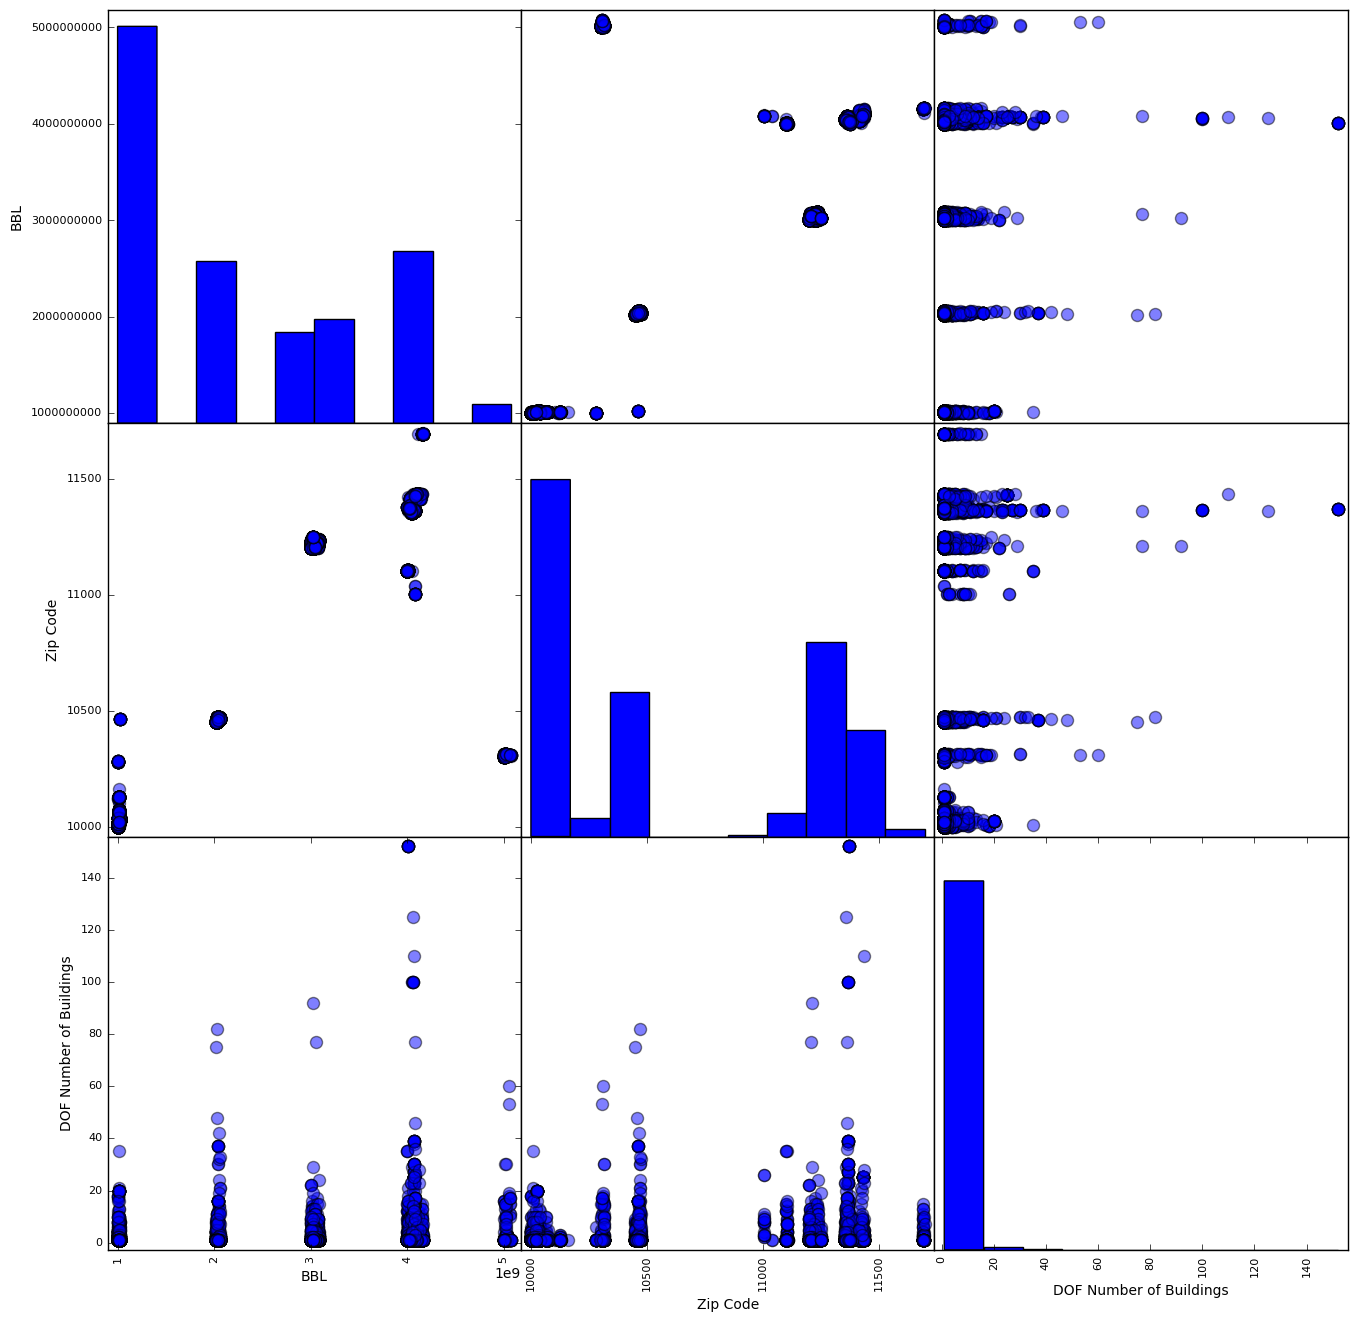

In [6]:
# Scatter matrix of nrg data.
scatter_matrix (nrg, s=300, figsize=(16, 16))

Figure 1: Scatter matrix of all numerical values in segmented NRG dataframe. 

In [7]:
# Return the types of each value in nrg data frame.
nrg.dtypes

BBL                                                 float64
Zip Code                                            float64
Reported Property Floor Area (Building(s)) (ft²)     object
DOF Number of Buildings                             float64
Site EUI(kBtu/ft2)                                   object
dtype: object

In [8]:
# Convert objects to numerical values in preparation for merging.
nrg['Site EUI(kBtu/ft2)'] = pd.to_numeric(nrg['Site EUI(kBtu/ft2)'],errors = 'coerce')
nrg['Reported Property Floor Area (Building(s)) (ft²)'] = pd.to_numeric(nrg['Reported Property Floor Area (Building(s)) (ft²)'],errors = 'coerce')

In [9]:
# Return the types of each value in bsize data frame.
bsize.dtypes

BBL           float64
UnitsRes        int64
UnitsTotal      int64
ZipCode         int64
dtype: object

## Merge Data Frames

In [10]:
# Merge data frames on unique value BBL.
bblData = pd.merge(nrg, bsize, on = 'BBL')
bblData.head()

,BBL,Zip Code,Reported Property Floor Area (Building(s)) (ft²),DOF Number of Buildings,Site EUI(kBtu/ft2),UnitsRes,UnitsTotal,ZipCode
0,1.006700e+09,10001.0,NaN,1.0,NaN,0,1,10001
1,1.004370e+09,10009.0,NaN,1.0,NaN,0,4,10009
2,1.013110e+09,10022.0,330000.0,1.0,125.4,0,56,10022
3,1.009220e+09,10003.0,NaN,1.0,NaN,148,148,10003
4,1.007400e+09,NaN,68329.0,NaN,NaN,0,1,10011


In [11]:
bblData['Total Energy Used(kBtu)'] = bblData['Site EUI(kBtu/ft2)'] * bblData['Reported Property Floor Area (Building(s)) (ft²)']

In [12]:
bblData.describe()

/opt/rh/anaconda/root/envs/PUI2016_Python3/lib/python3.5/site-packages/numpy/lib/function_base.py:3403: RuntimeWarning: Invalid value encountered in median
  RuntimeWarning)


,BBL,Zip Code,Reported Property Floor Area (Building(s)) (ft²),DOF Number of Buildings,Site EUI(kBtu/ft2),UnitsRes,UnitsTotal,ZipCode,Total Energy Used(kBtu)
count,6.492000e+03,5964.000000,5.579000e+03,5974.000000,5.077000e+03,6492.000000,6492.000000,6492.000000,5.069000e+03
mean,1.012037e+09,10028.693662,2.139771e+05,1.275527,1.161758e+03,96.906038,108.948090,10028.479821,2.136455e+08
std,5.665916e+06,37.701012,3.248771e+05,1.697660,4.272501e+04,248.653949,252.170956,37.193135,5.245490e+09
min,1.000010e+09,10001.000000,0.000000e+00,1.000000,0.000000e+00,0.000000,0.000000,10001.000000,0.000000e+00
25%,1.008180e+09,NaN,NaN,NaN,NaN,0.000000,17.000000,10013.000000,NaN
50%,1.012344e+09,NaN,NaN,NaN,NaN,49.000000,58.000000,10022.000000,NaN
75%,1.015438e+09,NaN,NaN,NaN,NaN,106.250000,116.000000,10031.000000,NaN
max,1.022500e+09,10463.000000,9.515627e+06,35.000000,3.018493e+06,8759.000000,8805.000000,10463.000000,3.501452e+11


(1, 1000)

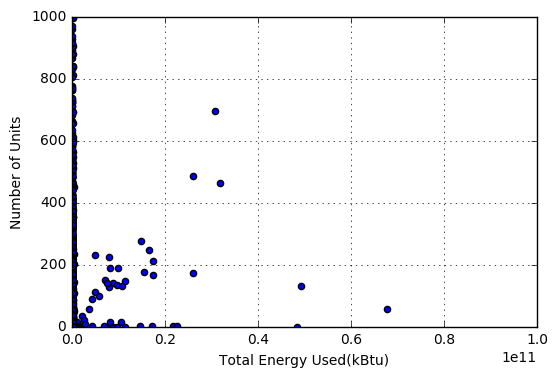

In [13]:
# Zoomed out view of Total Energy Used vs Number of Units. 
pl.scatter(bblData['Total Energy Used(kBtu)'], bblData['UnitsTotal'])
pl.xlabel('Total Energy Used(kBtu)')
pl.ylabel('Number of Units')
pl.grid(True)
xlim(1000,1e11)
ylim(1,1000)

Figure 2: Zoomed out view of Total Energy Used vs Number of Units in a building. 

(1, 1000)

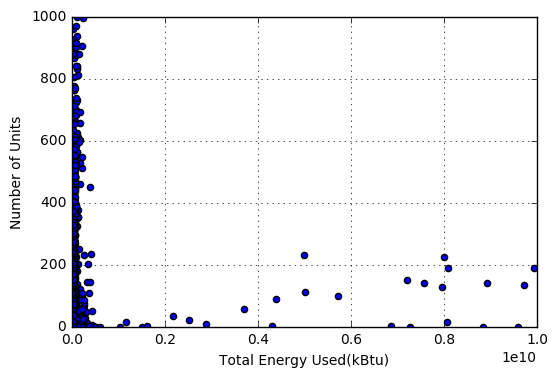

In [14]:
# Zoomed in view of Total Energy Used vs Number of Units.
pl.scatter(bblData['Total Energy Used(kBtu)'], bblData['UnitsTotal'])
pl.xlabel('Total Energy Used(kBtu)')
pl.ylabel('Number of Units')
pl.grid(True)
xlim(1000,1e10)
ylim(1,1000)

Figure 3: Zoomed in view of Total Energy Used vs the Number of Units in a building. 

In [16]:
# Remove outliers 
bblData_cut = bblData[bblData['Total Energy Used(kBtu)'] != 0]
bblData_cut = bblData[bblData['UnitsTotal'] > 10 ]
bblData_cut = bblData[bblData['UnitsTotal'] < 1000 ]

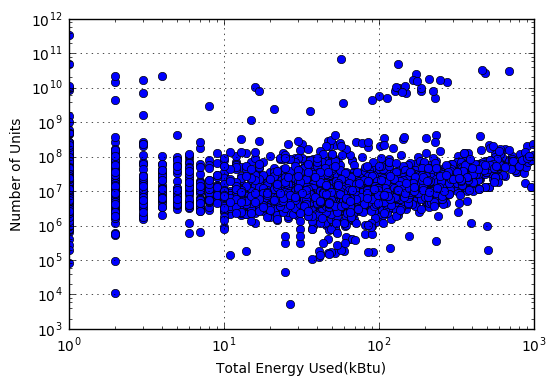

In [25]:
# log plot of Total Energy Used vs Number of Units.
pl.loglog(bblData_cut['UnitsTotal'], bblData_cut['Total Energy Used(kBtu)'], 'o')
pl.xlabel('Total Energy Used(kBtu)')
pl.ylabel('Number of Units')
pl.grid(True)

Figure 4: Log plot of Total Energy Used vs Number of Units in a building. 

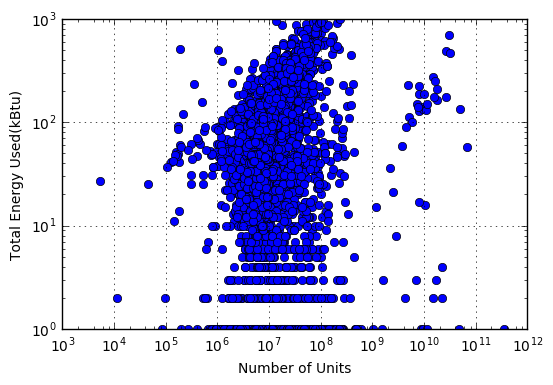

In [26]:
pl.loglog(bblData_cut['Total Energy Used(kBtu)'],bblData_cut['UnitsTotal'], 'o')
pl.xlabel('Number of Units')
pl.ylabel('Total Energy Used(kBtu)')
pl.grid(True)

Figure 5: Log plot of Number of Units in a building vs Total Energy Used. 